# Import libraries

In [2]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px

# have plots appear in notebook
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# make everything work locally
cf.go_offline()

# Basics

In [6]:
# create array
arr_1 = np.random.randn(50,4)
# create dataframe
df_1 = pd.DataFrame(arr_1, columns=['A','B','C','D'])

df_1.head()

,A,B,C,D
0,1.201578,-0.634878,-1.368715,-0.201971
1,-0.228647,-1.459647,0.013845,1.418691
2,-0.734781,-1.103951,1.074382,0.931703
3,-0.313643,-0.112349,0.039864,-0.502369
4,-0.874110,1.368236,0.165508,-0.201016


<AxesSubplot:>

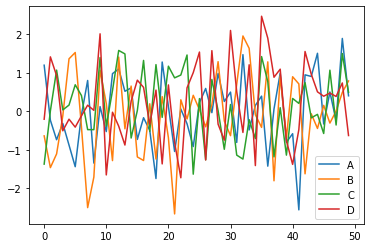

In [7]:
# look at normal plot with pandas built in
df_1.plot()

In [9]:
# look at plotly plot
df_1.iplot()

* notice how much more interactive!
* zoom in/out
* autoscale
* change axes

# Line Plots

In [13]:
import plotly.graph_objects as go 
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [14]:
# plot google stock price vs time
px.line(df_stocks, x='date', y='GOOG', labels={'x':'Date', 'y':'Price'})

In [15]:
# compare multiple tickers
px.line(df_stocks, x='date', y=['GOOG','AAPL'],
        labels={'x':'Date','y':'Price'}, title='Apple vs Google')

In [16]:
# complex graphs
fig = go.Figure()
# pull individual columns of data from dataset and use markers
fig.add_trace(go.Scatter(x=df_stocks['date'], y=df_stocks['AAPL'],
                        mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks['date'], y=df_stocks['AMZN'],
                        mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks['date'], y=df_stocks['GOOG'],
                        mode='lines+markers', name='Google',
                        line=dict(color='firebrick', width=2,
                                dash='dashdot')))



In [17]:
# update figure with new characteristics
fig.update_layout(title='Stock Price Data 2018 - 2020',
                xaxis_title='Price', yaxis_title='Date')